<a href="https://colab.research.google.com/github/MohammadMazraeh/realtime-crypto-analysis/blob/master/Sentiment_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Studying the relationship between sentiment value and bitcoin price fluctuation.**

In [1]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
import json
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import glob
from datetime import datetime, timedelta
plt.rcParams['axes.facecolor'] = 'white'
#plt.rcParams["figure.edgecolor"] = 'b'
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

**NEWS DATASET**

In [0]:

df1 = pd.read_csv('/content/drive/My Drive/jan1_score.csv')
df1 = df1.drop('Unnamed: 0', 1)

**BITCOIN PRICE DATASET**

In [0]:
df2 = pd.read_csv('/content/drive/My Drive/bitcoin_jan.csv')
df2 = df2.drop('Unnamed: 0', 1)

In [5]:
df1.head(5)

,web_url,content,headline,document_type,pub_date,source,section_name,author,word_count,content_no_stopwords,SENTIMENT_VALUE,SENTIMENT,relevance,score
0,https://www.nytimes.com/2019/01/02/world/europ...,"halmstad, sweden — maria hussein, who escaped ...",Where Doulas Calm Nerves and Bridge Cultures D...,article,2019-01-02T22:17:38+0000,The New York Times,World,CHRISTINA ANDERSON,1326,"halmstad, sweden — maria hussein, escaped war ...",1.0,Very Positive,0.002,0.0020
1,https://www.nytimes.com/2019/01/02/us/politics...,"voting rights and partisan gerrymandering, tra...",Voting Issues and Gerrymanders Are Now Key Pol...,article,2019-01-02T17:00:47+0000,The New York Times,U.S.,TRIP GABRIEL,1779,"voting rights partisan gerrymandering, traditi...",1.0,Very Positive,0.080,0.0800
2,https://www.nytimes.com/2019/01/02/world/asia/...,"new delhi — two women, accompanied by plainclo...","2 Indian Women Enter Sabarimala Temple, Settin...",article,2019-01-02T12:37:37+0000,The New York Times,World,KAI SCHULTZ and AYESHA VENKATARAMAN,778,"new delhi — two women, accompanied plainclothe...",-0.8,Very Negative,0.002,-0.0016
3,https://www.nytimes.com/2019/01/01/us/politics...,good tuesday morning and happy new year. here ...,On Politics: Elizabeth Warren Is Running for P...,article,2019-01-01T05:18:48+0000,The New York Times,U.S.,NaN,419,good tuesday morning happy new year. stories m...,0.9,Very Positive,0.080,0.0720
4,https://www.nytimes.com/2018/12/31/world/asia/...,"tokyo — kim jong-un, north korea’s leader, sai...","Kim Jong-un, Ready to Meet Trump ‘at Any Time,...",article,2019-01-01T01:44:15+0000,The New York Times,World,MOTOKO RICH and DAVID E. SANGER,1319,"tokyo — kim jong-un, north korea’s leader, sai...",1.0,Very Positive,0.080,0.0800


**Grouping news dataset by hour and taking the sum of score field in that partcular hour.**

In [6]:
df1['created'] = pd.to_datetime(df1['pub_date'])
df1.index = df1['created']

news_grouped = df1.groupby(pd.TimeGrouper('1h'))['score'].sum()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  after removing the cwd from sys.path.


**Grouping bitcoin price dataset by hour and taking the mean of price.**

In [9]:
df2.Timestamp_Rounded = pd.to_datetime(df2.Timestamp_Rounded)
df2.index = df2['Timestamp_Rounded']
crypto_grouped = df2.groupby(pd.TimeGrouper('1h'))['Close'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
crypto_grouped

**PLOT**

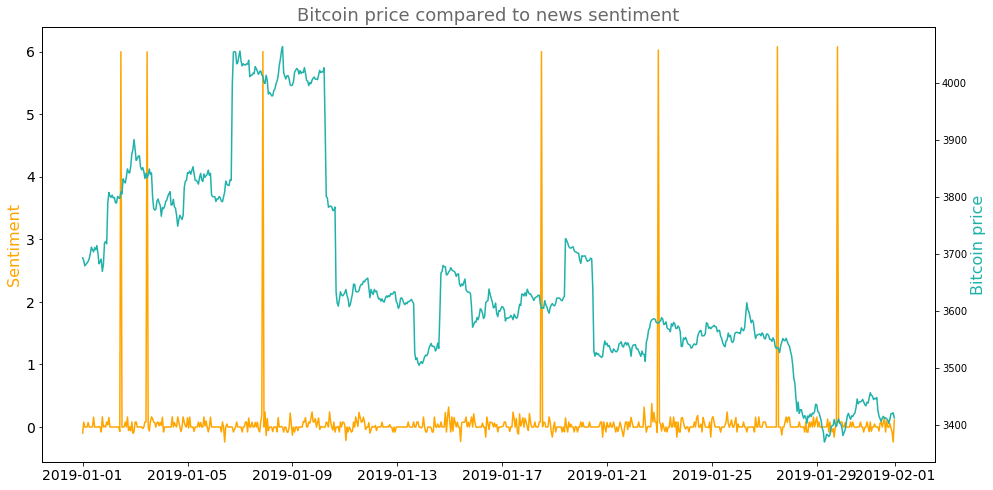

In [11]:
fig, ax1 = plt.subplots(figsize=(16,8))
ax1.set_title("Bitcoin price compared to news sentiment", fontsize=18,color = 'dimgrey')
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(news_grouped.index, news_grouped, 'orange')
ax2.plot_date(crypto_grouped.index, crypto_grouped, 'lightseagreen')

ax1.set_ylabel("Sentiment", color='orange', fontsize=16)
ax2.set_ylabel('Bitcoin price', color='lightseagreen', fontsize=16)
ax1.grid(False)
ax2.grid(False)


plt.show()

**NORMALIZING**

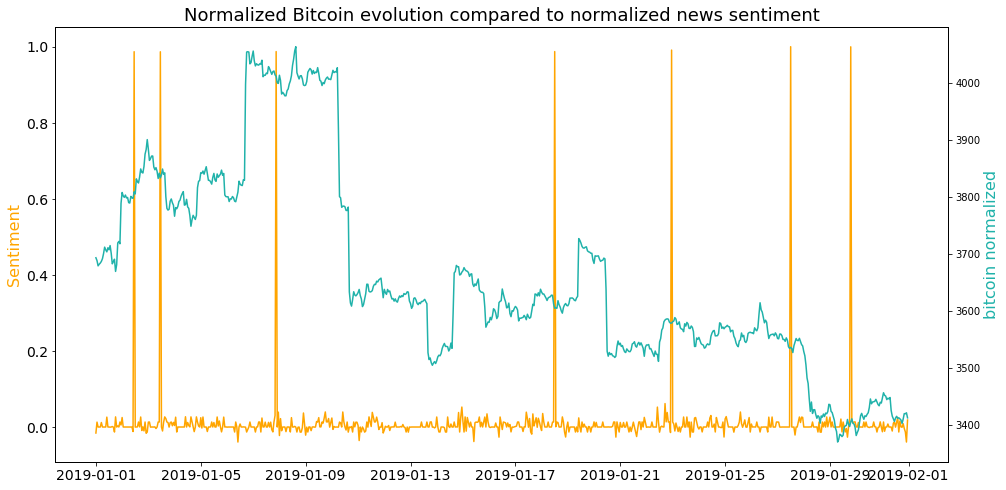

In [12]:
news_grouped = news_grouped / max(news_grouped.max(), abs(news_grouped.min()))
crypto_usd_grouped = crypto_grouped / max(crypto_grouped.max(), abs(crypto_grouped.min()))

fig, ax1 = plt.subplots(figsize=(16,8))
ax1.set_title("Normalized Bitcoin evolution compared to normalized news sentiment", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(news_grouped.index, news_grouped, 'orange')
ax2.plot_date(crypto_grouped.index, crypto_grouped, 'lightseagreen')

ax1.set_ylabel("Sentiment", color='orange', fontsize=16)
ax2.set_ylabel("bitcoin normalized", color='lightseagreen', fontsize=16)
plt.show()

**Derivation**

In [0]:

# Derivative
news_grouped = pd.Series(np.gradient(news_grouped.values), news_grouped.index, name='slope')
crypto_usd_grouped = pd.Series(np.gradient(crypto_usd_grouped.values), crypto_usd_grouped.index, name='slope')

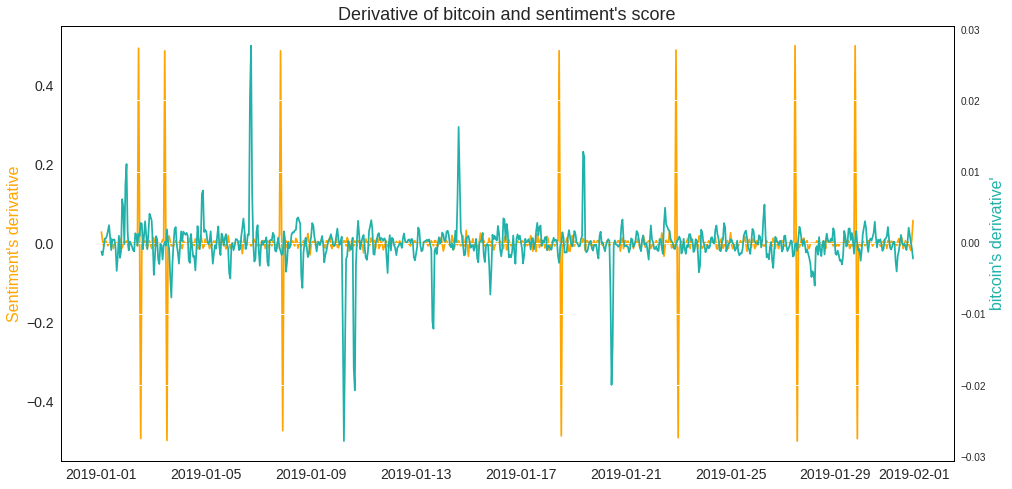

In [0]:
fig, ax1 = plt.subplots(figsize=(16,8))
ax1.set_title("Derivative of bitcoin and sentiment's score", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(news_grouped.index, news_grouped, 'orange')
ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'lightseagreen')

ax1.set_ylabel("Sentiment's derivative", color='orange', fontsize=16)
ax2.set_ylabel("bitcoin's derivative'", color='lightseagreen', fontsize=16)
plt.show()

In [0]:
df4 = pd.read_csv('/content/drive/My Drive/crypto-markets.csv')
#df2 = df2.drop('Unnamed: 0', 1)

In [0]:
df4.head(5)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


In [0]:
df3 = df4[['name','date','open','high','low','close','volume']]
df3 = df3.loc[df3['name'] == 'Bitcoin']

In [0]:
df3.head(5)

,name,date,open,high,low,close,volume
0,Bitcoin,2013-04-28,135.30,135.98,132.10,134.21,0.0
1,Bitcoin,2013-04-29,134.44,147.49,134.00,144.54,0.0
2,Bitcoin,2013-04-30,144.00,146.93,134.05,139.00,0.0
3,Bitcoin,2013-05-01,139.00,139.89,107.72,116.99,0.0
4,Bitcoin,2013-05-02,116.38,125.60,92.28,105.21,0.0


In [0]:
df3.date.dtype

dtype('O')

In [0]:
df3.date = pd.to_datetime(df3.date)
df3.index = df3['date']
crypto_usd_grouped = df3.groupby('date')['close'].sum()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
crypto_usd_volume = df3.groupby('date')['volume'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'date' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


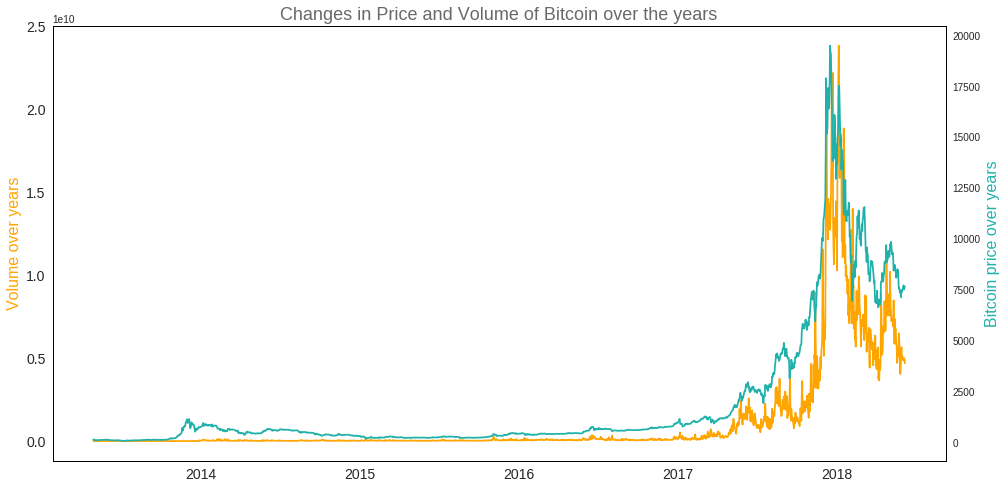

In [0]:
fig, ax1 = plt.subplots(figsize=(16,8))
ax1.set_title("Changes in Price and Volume of Bitcoin over the years", fontsize=18,color = 'dimgrey')
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(crypto_usd_volume.index, crypto_usd_volume, 'orange')
ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'lightseagreen')

ax1.set_ylabel("Volume over years", color='orange', fontsize=16)
ax2.set_ylabel('Bitcoin price over years', color='lightseagreen', fontsize=16)
ax1.grid(False)
ax2.grid(False)

In [0]:
df2.Timestamp_Rounded = pd.to_datetime(df2.Timestamp_Rounded)
df2.index = df2['Timestamp_Rounded']
crypto_usd_grouped1 = df2.groupby(pd.TimeGrouper('1h'))['Close'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
crypto_usd_grouped1

In [0]:
crypto_usd_volume = df2.groupby(pd.TimeGrouper('1h'))['Volume'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


In [0]:
crypto_usd_volume

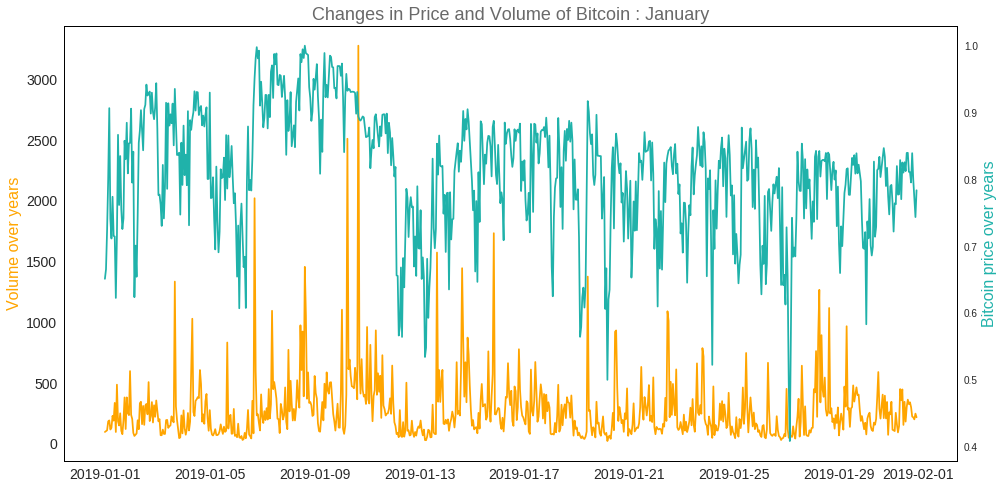

In [0]:
fig, ax1 = plt.subplots(figsize=(16,8))
ax1.set_title("Changes in Price and Volume of Bitcoin : January", fontsize=18,color = 'dimgrey')
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(crypto_usd_volume.index, crypto_usd_volume, 'orange')
ax2.plot_date(crypto_usd_grouped1.index, crypto_usd_grouped1, 'lightseagreen')

ax1.set_ylabel("Volume over years", color='orange', fontsize=16)
ax2.set_ylabel('Bitcoin price over years', color='lightseagreen', fontsize=16)
ax1.grid(False)
ax2.grid(False)

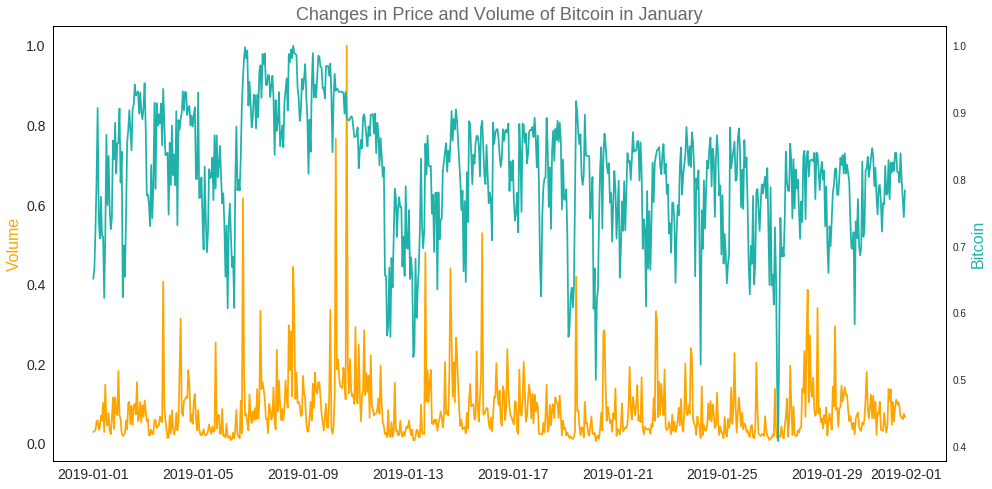

In [0]:
crypto_usd_volume = crypto_usd_volume / max(crypto_usd_volume.max(), abs(crypto_usd_volume.min()))
crypto_usd_grouped1 = crypto_usd_grouped1 / max(crypto_usd_grouped1.max(), abs(crypto_usd_grouped1.min()))

fig, ax1 = plt.subplots(figsize=(16,8))
ax1.set_title("Changes in Price and Volume of Bitcoin in January", fontsize=18,color = 'dimgrey')
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(crypto_usd_volume.index, crypto_usd_volume, 'orange')
ax2.plot_date(crypto_usd_grouped1.index, crypto_usd_grouped1, 'lightseagreen')

ax1.set_ylabel("Volume", color='orange', fontsize=16)
ax2.set_ylabel('Bitcoin', color='lightseagreen', fontsize=16)
ax1.grid(False)
ax2.grid(False)
